In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

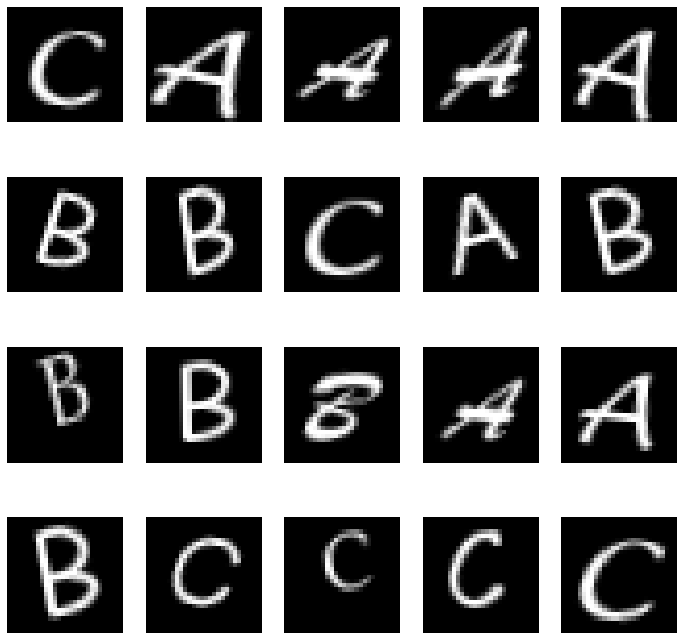

In [5]:
letters_train_mat = io.loadmat('lettersTrainSet.mat')
letters_test_mat = io.loadmat('lettersTestSet.mat')
XTrain = letters_train_mat['XTrain']
TTrain = letters_train_mat['TTrain_cell']
XTest = letters_test_mat['XTest']
TTest = letters_test_mat['TTest_cell']

perm = np.random.permutation(1500)[:20]


# By default, Keras expects data in form (batch, height, width, channels) 
XTrain = np.transpose(XTrain,axes=[3,0,1,2])
XTest = np.transpose(XTest,axes=[3,0,1,2])



fig,axs = plt.subplots(4,5)
axs = axs.reshape(-1)

for j in range(len(axs)):
    axs[j].imshow(np.squeeze(XTrain[perm[j],:,:,:]),cmap='gray')
    axs[j].axis('off')

In [6]:
classes = np.unique(TTrain)
y_train_label = np.zeros_like(TTrain)
y_test_label = np.zeros_like(TTest)
for nc in range(len(classes)):
    y_train_label[TTrain == classes[nc]] = nc
    y_test_label[TTest == classes[nc]] = nc

y_train_label = y_train_label.reshape(-1)
y_test_label = y_test_label.reshape(-1)
    
#one-hot encode categorical classes
y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)

In [7]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(len(classes), activation='softmax'))

sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model.fit(XTrain, y_train, epochs=30)

Epoch 1/30
47/47 [==============================] - 0s 4ms/step - loss: 0.5271
Epoch 2/30
47/47 [==============================] - 0s 4ms/step - loss: 0.0581
Epoch 3/30
47/47 [==============================] - ETA: 0s - loss: 0.020 - 0s 3ms/step - loss: 0.0194
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 6/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 7/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 8/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 9/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 10/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 11/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 12/30
47/47 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 13/30
47/47 [======

In [8]:
YPredict = np.argmax(model.predict(XTest),axis=1)
# argmax reverses the one-hot encoding scheme

accuracy = np.sum(YPredict == y_test_label)/len(y_test_label)
print('Accuracy = {}'.format(accuracy))

Accuracy = 0.9193333333333333
